In [63]:
import matplotlib.pyplot as plt
import random
plt.rcParams['figure.figsize'] =(6,6)

In [64]:
state = NQueensState.random_state(N=4)
print(state)

[2, 2, 3, 4] <4>


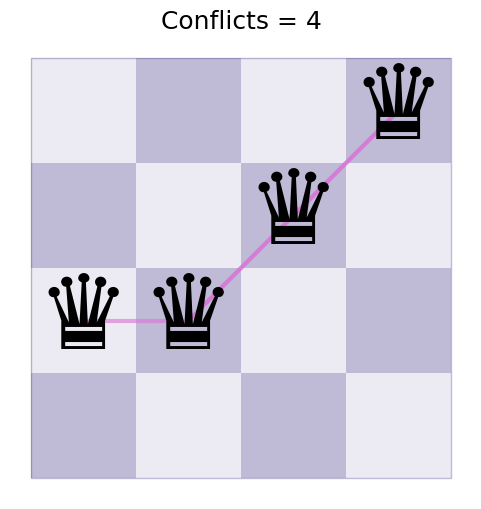

In [65]:
state.plot(show_conflicts=True)

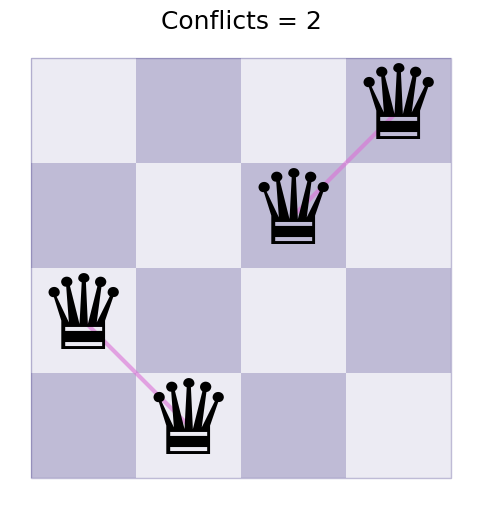

In [66]:
best_neighbor = state.best_neighbor()
best_neighbor.plot(show_conflicts=True)

In [67]:
class NQueensState:
    '''N-Queens state based on first formulation'''
    
    def __init__(self, queens=None, N=8):
        ''' Constructor '''

        if queens:
            self.N = len(queens)
            self.queens = queens.copy()
        else:
            self.N = N
            self.queens = list(range(1, N + 1))

        self.num_conflicts = None    
        
    def __eq__(self, other):
        if self is other: return True
        if other is None: return False
        if not isinstance(other, NQueensState): return False
    
        return self.queens == other.queens
    
    def __ge__(self, other):
        if self is other: return True
        if other is None: return False
        if not isinstance(other, NQueensState): return False
    
        return self.conflicts() >= other.conflicts()        
        
    def conflicts(self):
        ''' Computes number of pairs og queens which are on the same row or diagonal'''

        if self.num_conflicts is None:
            self.num_conflicts = sum([abs(self.queens[j] - self.queens[i]) == j - i or self.queens[j] == self.queens[i]
                                      for i in range(self.N - 1)
                                      for j in range(i + 1, self.N)])

        return self.num_conflicts
                            
    def neighbors(self):
        ''' Create all successors by moving a queen to another row in its column '''

        N = self.N
                
        for col in range(N):
            for row in range(1, N + 1):
                if self.queens[col] == row: continue
                neighbor = NQueensState(queens=self.queens)
                neighbor.queens[col] = row
                yield neighbor

    
    def best_neighbor(self):
        ''' find a neighbor with minimum number of conflicts'''

        min_conflicts = self.N * (self.N - 1) // 2
        best = None
        for neighbor in self.neighbors():
            if neighbor.conflicts() < min_conflicts:
                min_conflicts, best = neighbor.conflicts(), neighbor
        return best
    
    def random_neighbor(self):
        ''' find a random neighbor by moving a random queen to another row in its column '''
        
        neighbor = NQueensState(queens=self.queens)

        col = random.randint(0, self.N - 1)
        row = random.randint(1, self.N)
        while row == col:
            row = random.randint(1, self.N)
        
        neighbor.queens[col] = row
        return neighbor
    
    @staticmethod
    def random_state(N=8):
        queens = [random.randint(1, N) for col in range(N)]
        return NQueensState(queens=queens)

    def plot(self, ax=None, figsize=(6, 6), show_conflicts=False, fc='darkslateblue'):
        
        if ax is None:
            fig = plt.figure(figsize=figsize)
            ax = fig.add_subplot(1,1,1)
        
        N = self.N

        border = plt.Rectangle((0, 0), N, N, ec=fc, fc='w', alpha=0.35)
        ax.add_patch(border)

        # draw chess board
        for i in range(N):
            for j in range(N):
                alpha = 0.35 if (i + j) % 2 == 0 else 0.1
                cell = plt.Rectangle((i, j), 1, 1, fc=fc, alpha=alpha)
                ax.add_patch(cell)

        # show conflicts
        if show_conflicts:
            for i in range(N - 1):
                row_i = self.queens[i]
                for j in range(i + 1, N):
                    row_j = self.queens[j]
                    if row_i == row_j or abs(row_i - row_j) == j - i:
                        x1, x2 = i + 0.5, j + 0.5
                        y1, y2 = (row_i - 1) + 0.5, (row_j - 1) + 0.5
                        line = plt.Line2D((x1, x2), (y1, y2), lw=3, ls='-', color='orchid', alpha=0.6)
                        ax.add_line(line)

        # place queens on chess board
        for col, row in enumerate(self.queens):
            x = col + 0.5
            y = (row - 1) + 0.5
            fs = max(1, figsize[0] * 50 // N)
            ax.text(x, y, '♛', color='k', fontsize=fs, ha='center', va='center')

        ax.axis('square')
        ax.axis('off')
        ax.set_title("Conflicts = {}".format(self.conflicts()), fontsize=18)
        plt.show()    
        
    def __str__(self):
        return f'{self.queens} <{self.conflicts()}>'
    
    def __repr__(self):
        return f'NQueensState(queens={self.queens})'

In [68]:
class HillClimbing:
    
    def __init__(self):
        self.history = []
        
    def search(self, state, verbose=0):
        current = state
        
        while True:
            if   verbose == 1: print(current)
            elif verbose == 2: current.plot(show_conflicts=False)
            elif verbose == 3: current.plot(show_conflicts=True)
            
            self.history.append(current)

            neighbor = current.best_neighbor()
            if neighbor >= current: return current
            current = neighbor
    
    def __call__(self, state, verbose=0):
        self.search(state, verbose)
        
    def plot_history(self):
        plt.figure(figsize=(12, 4))

        conflicts = [state.conflicts() for state in self.history]
        plt.plot(range(len(conflicts)), conflicts)
        plt.xlabel('Iteration')
        plt.ylabel('Conflicts')
        plt.show()

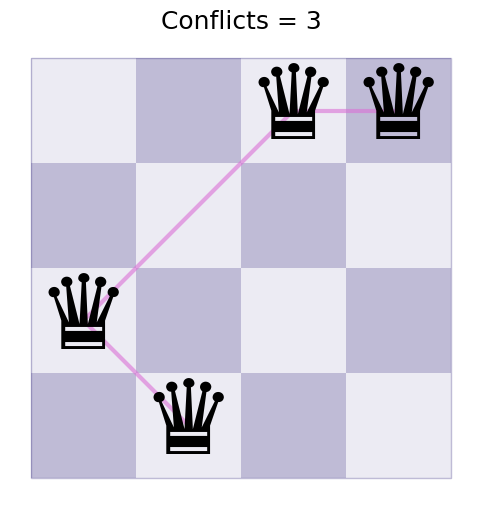

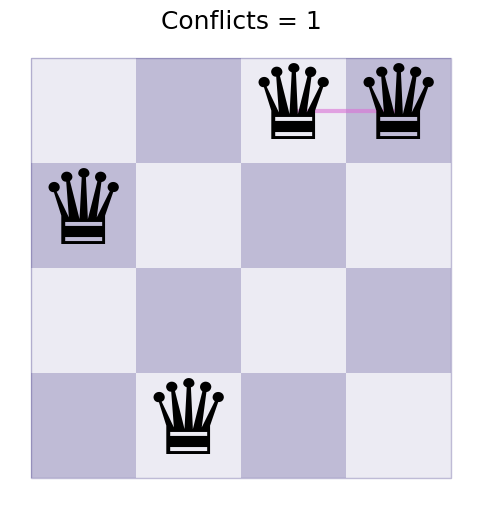

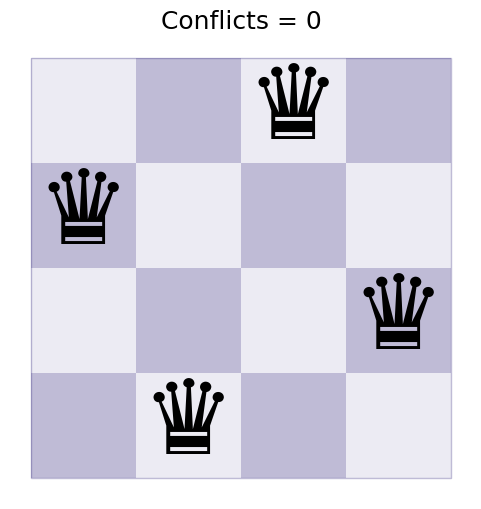

In [69]:
initial_state = NQueensState.random_state(4)
ha = HillClimbing()
solution = ha(initial_state, verbose=3)

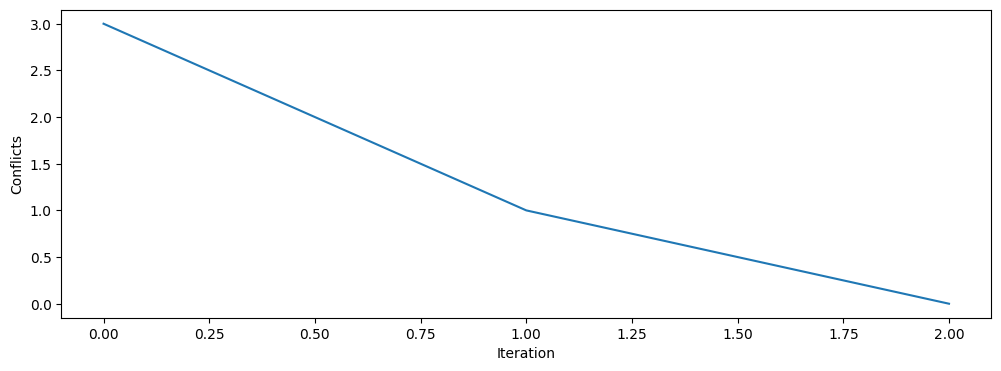

In [70]:
ha.plot_history()

In [71]:
def update_plot(i, show_conflicts):
    state = ha.history[i - 1]
    state.plot(show_conflicts=show_conflicts)

In [72]:
class NQueensStatePermutation:
    '''N-Queens state based on permutation formulation'''
    
    def __init__(self, queens=None, N=8):
        ''' Constructor '''

        if queens:
            self.N = len(queens)
            self.queens = queens.copy()
        else:
            self.N = N
            self.queens = list(range(1, N + 1))

        self.num_conflicts = None    
        
    def __eq__(self, other):
        if self is other: return True
        if other is None: return False
        if not isinstance(other, NQueensStatePermutation): return False
    
        return self.queens == other.queens
    
    def __ge__(self, other):
        if self is other: return True
        if other is None: return False
        if not isinstance(other, NQueensStatePermutation): return False
    
        return self.conflicts() >= other.conflicts()        
        
    def conflicts(self):
        ''' Computes number of pairs og queens which are on the same diagonal'''

        if self.num_conflicts is None:
            self.num_conflicts = sum([abs(self.queens[j] - self.queens[i]) == j - i
                                      for i in range(self.N - 1)
                                      for j in range(i + 1, self.N)])

        return self.num_conflicts
                            
    def neighbors(self):
        ''' Create all successors by considering every pair and swaping their position'''

        N = self.N
        
        for i in range(N - 1):
            for j in range(i + 1, N):
                neighbor = NQueensStatePermutation(queens=self.queens)
                neighbor.queens[i], neighbor.queens[j] = neighbor.queens[j], neighbor.queens[i]
                yield neighbor

    
    def best_neighbor(self):
        ''' find a neighbor with minimum number of conflicts'''

        min_conflicts = self.N * (self.N - 1) // 2
        best = None
        for neighbor in self.neighbors():
            if neighbor.conflicts() < min_conflicts:
                min_conflicts, best = neighbor.conflicts(), neighbor
        return best
    
    def random_neighbor(self):
        ''' find a random neighbor by swaping two randomly selected queens'''

        i = random.randint(0, self.N - 2)
        j = random.randint(i + 1, self.N - 1)
        neighbor = NQueensStatePermutation(queens=self.queens)
        neighbor.queens[i], neighbor.queens[j] = neighbor.queens[j], neighbor.queens[i]
        return neighbor
            
    @staticmethod
    def random_state(N=8):
        queens = list(range(1, N + 1))
        random.shuffle(queens)
        return NQueensStatePermutation(queens=queens)

    def plot(self, ax=None, width=512, height=512, show_conflicts=False, fc='darkslateblue'):
        if ax is None:
            fig = plt.figure()
            ax = fig.add_subplot(1, 1, 1)

        N = self.N

        w, h = width // N, height // N

        border = plt.Rectangle((0, 0), N * w, N * h, ec=fc, fc='w', alpha=0.35)
        ax.add_patch(border)

        # draw chess board
        for i in range(N):
            for j in range(N):
                alpha = 0.35 if (i + j) % 2 == 0 else 0.1
                cell = plt.Rectangle((i * w, j * h), w, h, fc=fc, alpha=alpha)
                ax.add_patch(cell)
        
        # show conflicts
        if show_conflicts:
            for i in range(N - 1):
                row_i = self.queens[i]
                for j in range(i + 1, N):
                    row_j = self.queens[j]
                    if row_i == row_j or abs(row_i - row_j) == j - i:
                        x1, x2 = i * w + w // 2, j * w + w // 2
                        y1, y2 = (row_i - 1) * h + h // 2, (row_j - 1) * h + h // 2
                        line = plt.Line2D((x1, x2), (y1, y2), lw=3, ls='-', color='orchid', alpha=0.6)
                        ax.add_line(line)

        # place queens on chess board
        for col, row in enumerate(self.queens):
            c = 'k' if (col + row) % 2 == 0 else 'w'
            x = col * w + w // 2
            y = (row - 1) * h + h // 2
            fs = w // 2
            ax.text(x, y, '♛', color='k', fontsize=fs, ha='center', va='center')

        ax.axis('square')
        ax.axis('off')
        ax.set_title("Conflicts = {}".format(self.conflicts()), fontsize=12)
        plt.show()    
        
    def __str__(self):
        return f'{self.queens} <{self.conflicts()}>'
    
    def __repr__(self):
        return f'NQueensStatePermutation(queens={self.queens})'
    
    

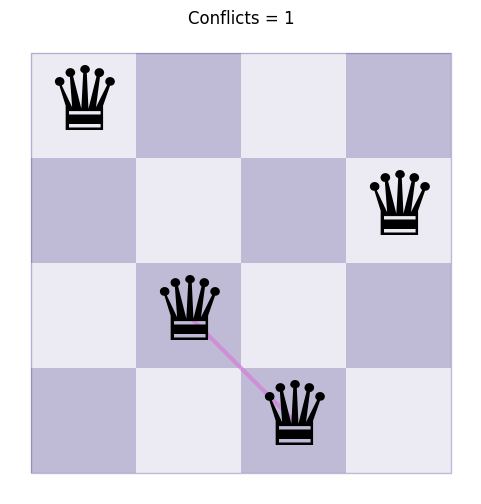

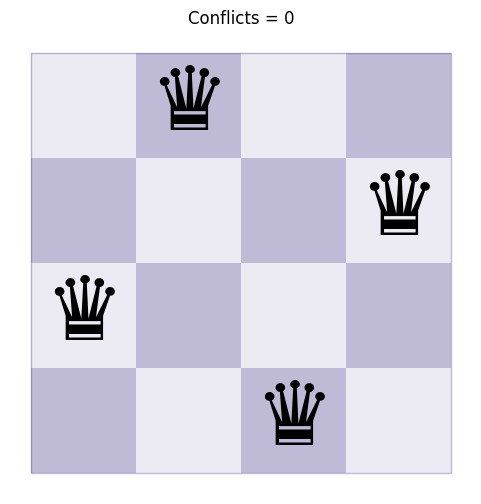

In [73]:
initial_state = NQueensStatePermutation.random_state(N=4)
ha = HillClimbing()

solution = ha(initial_state, verbose=3)